In [91]:
import numpy as np
import pandas as pd
import pickle
import os
from sklearn.cluster import KMeans
from skimage.color import rgb2grey
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dropout, MaxPooling2D, Conv2D, Dense
from keras.datasets import cifar10
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

# Load the data and Extract class birds


In [26]:
def unpickle_data(file): #reading the file and gathering features and labels
    with open(file, 'rb') as fo:
        dict_ = pickle.load(fo, encoding='bytes')
    features = dict_[b'data'].reshape((len(dict_[b'data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = dict_[b'labels']
    return (features, labels)

In [31]:
def merge_data(data): #extracting only the class birds
    data_list = []
    for i in range(len(data[0])):
        if data[1][i] == 2:
            data_list.append(data[0][i])
    return data_list

In [28]:
def load_files(path): #loading files from directory and combining them together into one list
    final_data = []
    dirs = os.listdir(path)
    for file in dirs:
        if file.endswith(("batch_1","batch_2","batch_3","batch_4","batch_5","batch")):
            data = unpickle_data(file)
            final_data += merge_data(data)
    return final_data
            
    

In [29]:
path = 'C:\\Users\\Shivani\\Tensorflow_projects' #directory where the input files are stored

In [38]:
result_data = load_files(path)
print(np.array(result_data).shape) #the data contains 6000 images each of 32 x 32 pixels in 3 num_channels(blue,red and green)

(6000, 32, 32, 3)


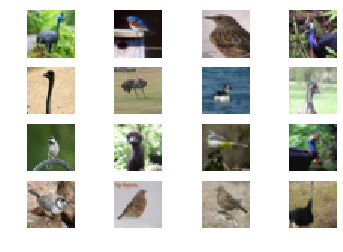

In [39]:
for i in range(0,16):           #showing 16 images in the data
    axis = plt.subplot(4,4,i+1)
    arr = result_data[i]
    axis.imshow(arr)
    plt.axis('off')
plt.show()

In [41]:
pixel_vector = np.reshape(result_data, (6144000, 3)) #choosing atleast 10% of the pixels.Each pixel is an RGB vector with 3 elements

# K-Means Clustering

In [62]:
kmeans = KMeans(n_clusters = 4) #Running KMeans algortihm on k=4 which identifies 4 cluster centers which are the main colors
kmeans = kmeans.fit(pixel_vector)           #Colored images are converted into 4-color images by converting each pixel's value to the closest main color in terms of Euclidean distance

In [63]:
kmeans.cluster_centers_ 

array([[107., 107.,  81.],
       [155., 155., 134.],
       [ 49.,  49.,  37.],
       [206., 211., 210.]])

In [106]:
temp = pixel_vector

In [107]:
pixel_vector.shape

(6144000, 3)

# Visualizing some images of birds after k-means


In [108]:
for i in range(len(pixel_vector)):
    temp[i] = kmeans.cluster_centers_[kmeans.labels_[i]]

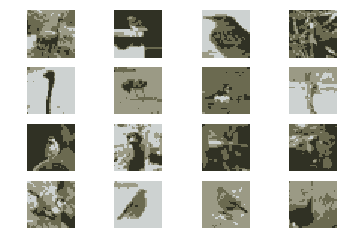

In [109]:
X_viz = temp.reshape((6000,32,32,3))
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = X_viz[i]
    axis.imshow(arr)
    plt.axis('off')
plt.show()

In [110]:
y_N = keras.utils.to_categorical(kmeans.labels_).reshape((6000,32,32,4))

In [111]:
X = pixel_vector.reshape((6000,32,32,3))

In [112]:
X_N = []
for i in range(len(X)):
    X_N.append(rgb2grey(X[i]).tolist())

In [113]:
X_N = np.array(X_N)

# Visualizing some images of birds (train data) after converting to grey scale


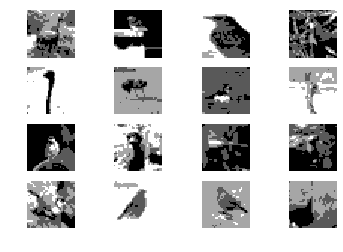

In [114]:
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = X_N[i]
    axis.imshow(arr,cmap='gray')
    plt.axis('off')
plt.show()

In [115]:
X_N = X_N.reshape((6000,32,32,1))

In [116]:
X_N.shape, y_N.shape

((6000, 32, 32, 1), (6000, 32, 32, 4))

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X_N, y_N, test_size=0.01, random_state=10)

In [122]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5940, 32, 32, 1), (5940, 32, 32, 4), (60, 32, 32, 1), (60, 32, 32, 4))

In [123]:
cnn = Sequential()
cnn.add(Conv2D(64, kernel_size = (5,5), strides=(1, 1), padding='same', input_shape = (32,32,1)))
cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
cnn.add(Conv2D(64, kernel_size = (5,5), strides=(1, 1), padding='same'))
cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
cnn.add(Dense(32, activation='softmax'))
cnn.add(Dense(4, activation='softmax'))
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 64)        1664      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        102464    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dense_3 (Dense)              (None, 32, 32, 32)        2080      
_________________________________________________________________
dense_4 (Dense)              (None, 32, 32, 4)         132       
Total params: 106,340
Trainable params: 106,340
Non-trainable params: 0
________________________________________________

Train on 5346 samples, validate on 594 samples
Epoch 1/30
5346/5346 [==============================] - 45s 8ms/step - loss: 1.1339 - accuracy: 0.6379 - val_loss: 0.9792 - val_accuracy: 0.7514
Epoch 2/30
5346/5346 [==============================] - 51s 9ms/step - loss: 0.8917 - accuracy: 0.7785 - val_loss: 0.8208 - val_accuracy: 0.7856
Epoch 3/30
5346/5346 [==============================] - 52s 10ms/step - loss: 0.7546 - accuracy: 0.8052 - val_loss: 0.7053 - val_accuracy: 0.8064
Epoch 4/30
5346/5346 [==============================] - 58s 11ms/step - loss: 0.6533 - accuracy: 0.8207 - val_loss: 0.6279 - val_accuracy: 0.8130
Epoch 5/30
5346/5346 [==============================] - 71s 13ms/step - loss: 0.5810 - accuracy: 0.8284 - val_loss: 0.5573 - val_accuracy: 0.8226
Epoch 6/30
5346/5346 [==============================] - 78s 15ms/step - loss: 0.5266 - accuracy: 0.8334 - val_loss: 0.5131 - val_accuracy: 0.8258
Epoch 7/30
5346/5346 [==============================] - 79s 15ms/step - loss: 0

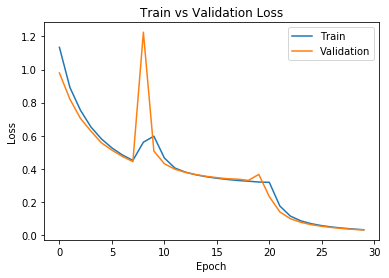

In [124]:
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
history = cnn.fit(X_train, y_train, epochs=30, validation_split=0.1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [126]:
prediction = cnn.predict(X_test)

In [127]:
prediction.shape

(60, 32, 32, 4)

In [151]:
prediction = prediction.reshape(61440,4)
output_images = []
for p in range(len(prediction)):
    output_images.append([int(op) for op in kmeans.cluster_centers_[np.argmax(prediction[p])]])

In [153]:
output_images = np.reshape(output_images,(60,32,32,3))

In [144]:
y_test.shape

(60, 32, 32, 4)

In [146]:
y_test = y_test.reshape(61440,4)
y_test_images = []
for p in range(len(y_test)):
    y_test_images.append([int(op) for op in kmeans.cluster_centers_[np.argmax(y_test[p])]])

In [155]:
y_test_images = np.reshape(y_test_images,(60,32,32,3))

# Original Test Values

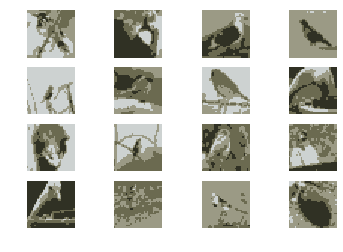

In [156]:
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = y_test_images[i]
    axis.imshow(arr)
    plt.axis('off')
plt.show()

# Predicted images

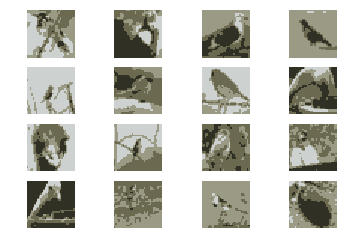

In [157]:
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = output_images[i]
    axis.imshow(arr)
    plt.axis('off')
plt.show()
